## Hyperparameter optimisation

## Simple Problem

In [16]:
import logging
import sys
import numpy as np
import optuna
from optuna import visualization


def thing_to_minimise(x):
    return (x - np.pi) ** 2


def objective(trial):
    x = trial.suggest_float("x", -10, 10)
    return thing_to_minimise(x)


study_simple_grid = optuna.create_study(sampler=optuna.samplers.GridSampler({"x":list(range(-10,10,1))}))
study_simple_grid.optimize(objective, n_trials=20)
visualization.plot_optimization_history(study_simple_grid)

[I 2023-09-28 10:56:54,602] A new study created in memory with name: no-name-be4d126f-8b96-4246-ae3e-f505c3c62aa1
[I 2023-09-28 10:56:54,604] Trial 0 finished with value: 51.0023456298077 and parameters: {'x': -4.0}. Best is trial 0 with value: 51.0023456298077.
[I 2023-09-28 10:56:54,606] Trial 1 finished with value: 34.32093663647308 and parameters: {'x': 9.0}. Best is trial 1 with value: 34.32093663647308.
[I 2023-09-28 10:56:54,607] Trial 2 finished with value: 3.453677865191427 and parameters: {'x': 5.0}. Best is trial 2 with value: 3.453677865191427.
[I 2023-09-28 10:56:54,609] Trial 3 finished with value: 1.3032337867301853 and parameters: {'x': 2.0}. Best is trial 3 with value: 1.3032337867301853.
[I 2023-09-28 10:56:54,611] Trial 4 finished with value: 17.152789708268944 and parameters: {'x': -1.0}. Best is trial 3 with value: 1.3032337867301853.
[I 2023-09-28 10:56:54,613] Trial 5 finished with value: 8.17049255801184 and parameters: {'x': 6.0}. Best is trial 3 with value: 1.

In [17]:
study_simple = optuna.create_study()
study_simple.optimize(objective, n_trials=50)
from optuna import visualization

visualization.plot_optimization_history(study_simple)

[I 2023-09-28 10:56:54,668] A new study created in memory with name: no-name-2e7098ac-644a-468f-80b6-4724de3d4317
[I 2023-09-28 10:56:54,670] Trial 0 finished with value: 21.379288292519536 and parameters: {'x': -1.4821815939832366}. Best is trial 0 with value: 21.379288292519536.
[I 2023-09-28 10:56:54,671] Trial 1 finished with value: 77.04999552952962 and parameters: {'x': -5.636220031215553}. Best is trial 0 with value: 21.379288292519536.
[I 2023-09-28 10:56:54,672] Trial 2 finished with value: 23.288306319416265 and parameters: {'x': -1.6842032724120788}. Best is trial 0 with value: 21.379288292519536.
[I 2023-09-28 10:56:54,673] Trial 3 finished with value: 3.3440452761198376 and parameters: {'x': 1.3129195619411416}. Best is trial 3 with value: 3.3440452761198376.
[I 2023-09-28 10:56:54,675] Trial 4 finished with value: 7.736040457008181 and parameters: {'x': 0.3602188101433246}. Best is trial 3 with value: 3.3440452761198376.
[I 2023-09-28 10:56:54,676] Trial 5 finished with v

- The default algorithm, `tpe.suggest`, is usually a good choice. Here it's better than grid seatch!
- We haven't touched hyperparameters yet!
- Here we've just optimised for $x$
- This illustrates the point we were making earlier - just think of hyperparameter optimisation basically like any other optimisation routine.

## Go to slides

In [18]:
print(f' Winning value was {study_simple.best_params} with a score of {study_simple.best_value}')

 Winning value was {'x': 3.1621426394535246} with a score of 0.00042230191899956317


## A More Realistic Problem

- For a simple algebraic problem like above, we would use a simpler method
- These techniques come into their own when we have more decisions to make about *how* we're structuring our models and functions. 
- In order to give us problem to work on, we're going to desecrate an SKlearn dataset:

In [19]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd

data = load_digits()
df = pd.DataFrame({'values': list(data.data), 'label': data.target})

df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)


proportion_to_remove = 0.0
filtered_indices = df_train[df_train['label'].isin([6,7])].index

num_rows_to_remove = int(len(filtered_indices) * proportion_to_remove)

rows_to_remove = np.random.choice(filtered_indices, num_rows_to_remove, replace=False)

df_train = df_train.drop(rows_to_remove)

df_train['label'].value_counts()


label
1    154
3    149
6    146
0    145
7    145
2    144
8    144
9    140
5    135
4    135
Name: count, dtype: int64

In [20]:
X_train = np.vstack(df_train['values'].values)
y_train = df_train['label'].values
X_test = np.vstack(df_test['values'].values)
y_test = df_test['label'].values


In [21]:
np.random.seed(42)
noise_factor = 5

X_train = X_train + noise_factor * np.random.randn(*X_train.shape)

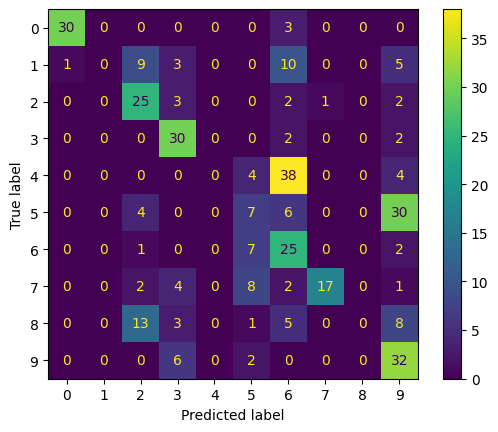

accuracy = 0.46111111111111114
[0.90909091 0.         0.75757576 0.88235294 0.         0.14893617
 0.71428571 0.5        0.         0.8       ]


In [22]:
import sklearn
import matplotlib.pyplot as plt
from sklearn.metrics import recall_score
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

# clf = LogisticRegression()
# clf=SGDClassifier()
clf = DecisionTreeClassifier(max_depth=3,min_samples_split=2)
clf.fit(X_train, y_train)

preds = clf.predict(X_test)


conf_mat = sklearn.metrics.confusion_matrix(y_test, preds)
conf = sklearn.metrics.ConfusionMatrixDisplay(conf_mat)
conf.plot()
plt.show()
print(f'accuracy = {accuracy_score(y_test, preds)}')
print(recall_score(y_test, preds, average=None))


This is terrible!
Can we do any better?

In the code below, notice:
- suggesting ints, floats, and categorical
- We can pick whatever metric we want for the optimisation!

In [23]:
import optuna
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from scipy.ndimage import gaussian_filter
import numpy as np

def reshape_x_with_gamma(X_set, sigma):
    return np.array([gaussian_filter(sample.reshape(8, 8), sigma=sigma).flatten() for sample in X_set])

def objective(trial):
    max_depth = trial.suggest_int('max_depth', 1, 32)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 32)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 32)
    sigma = trial.suggest_float('sigma', 0.01, 10, log=True)
    
    clf = DecisionTreeClassifier(
        max_depth=max_depth, 
        min_samples_split=min_samples_split, 
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )
    X_train_smoothed = reshape_x_with_gamma(sigma=sigma, X_set=X_train)

    score = cross_val_score(clf, X_train_smoothed, y_train, cv=5, scoring='accuracy').mean()
    
    return score


study_with_filter = optuna.create_study(direction='maximize')  
study_with_filter.optimize(
    objective,
    n_trials=50,
    n_jobs=-1,
    
    )  



visualization.plot_optimization_history(study_with_filter)

[I 2023-09-28 10:56:55,959] A new study created in memory with name: no-name-16486ccd-d6c0-4bc5-a2ee-a746fd2d3242
[I 2023-09-28 10:56:57,489] Trial 1 finished with value: 0.17745112272551297 and parameters: {'max_depth': 1, 'min_samples_split': 25, 'min_samples_leaf': 26, 'sigma': 0.14056473367106362}. Best is trial 1 with value: 0.17745112272551297.
[I 2023-09-28 10:56:57,713] Trial 2 finished with value: 0.5135743321718932 and parameters: {'max_depth': 32, 'min_samples_split': 24, 'min_samples_leaf': 6, 'sigma': 0.01743855879372422}. Best is trial 2 with value: 0.5135743321718932.
[I 2023-09-28 10:56:57,897] Trial 5 finished with value: 0.2707050909794812 and parameters: {'max_depth': 26, 'min_samples_split': 30, 'min_samples_leaf': 13, 'sigma': 2.7374419576251365}. Best is trial 2 with value: 0.5135743321718932.
[I 2023-09-28 10:56:57,988] Trial 0 finished with value: 0.5177724545102593 and parameters: {'max_depth': 25, 'min_samples_split': 12, 'min_samples_leaf': 12, 'sigma': 0.031

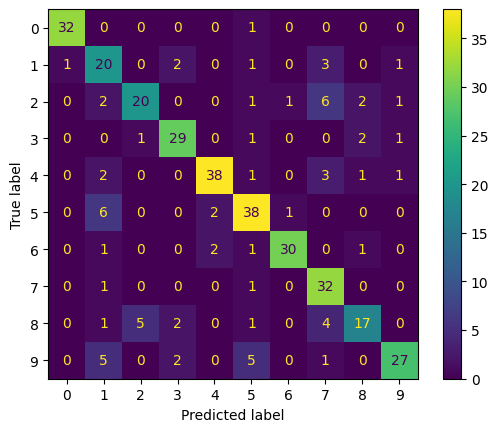

Optimized accuracy = 0.7861111111111111
[0.96969697 0.71428571 0.60606061 0.85294118 0.82608696 0.80851064
 0.85714286 0.94117647 0.56666667 0.675     ]


In [24]:
# Get the best parameters and train the final model
best_sigma = study_with_filter.best_params['sigma']
clf_params = {key: value for key, value in study_with_filter.best_params.items() if key !='sigma'}

clf_optimized = DecisionTreeClassifier(**clf_params, random_state=42)
clf_optimized.fit(X_train, y_train)

# Make predictions with the optimized model
preds = clf_optimized.predict(X_test)

# Display the results
conf_mat = sklearn.metrics.confusion_matrix(y_test, preds)
conf = sklearn.metrics.ConfusionMatrixDisplay(conf_mat)
conf.plot()
plt.show()
print(f'Optimized accuracy = {accuracy_score(y_test, preds)}')
print(recall_score(y_test, preds, average=None))

## Go To Slides

## Exercise 1: Pick a wine (classifier)

In [25]:
import numpy as np
from sklearn.datasets import load_wine
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

data = load_wine()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# We have to add noise again because otherwise it's too good out of the box, lol
wine_noise_amount = 3
X_train = X_train + np.random.normal(loc=0, scale=wine_noise_amount, size=X_train.shape)



In [26]:

clf = RandomForestClassifier(n_estimators=4, random_state=42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:")
print(classification_report(y_test, y_pred))


Model Accuracy: 83.33%
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.93      0.84        14
           1       0.92      0.86      0.89        14
           2       0.83      0.62      0.71         8

    accuracy                           0.83        36
   macro avg       0.84      0.80      0.81        36
weighted avg       0.84      0.83      0.83        36



- create your objective function, which takes a `trial` object as input
- fit the model inside the function
- make sure you're returning the score which you want to optimise (pick one!)
- Inside the objective function, use `trial.suggest_...` to create values for your hyperparameters
- Here's some to try:
  - `n_estimators` (number of decision trees in the 'forest')
  - `max_depth` (depth of each tree in the forest)
  - `min_samples_split` (number of training samples required to introduce a branch. A bit like the resolution / sensitivity of the model.)

In [27]:
def objective_for_wine(trial):
    pass #YOUR CODE HERE

- Can you plot the study?
- Did you run the trials in parallel?
- Can you print the best params?

In [28]:
"""
CREDIT: This block is adapted from optuna_examples:
https://github.com/optuna/optuna-examples/blob/main/keras/keras_simple.py
"""
import urllib
import warnings

import optuna

from keras.backend import clear_session
from keras.datasets import mnist
from keras.layers import Conv2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop

# Register a global custom opener to avoid HTTP Error 403: Forbidden when downloading MNIST.
opener = urllib.request.build_opener()
opener.addheaders = [("User-agent", "Mozilla/5.0")]
urllib.request.install_opener(opener)


N_TRAIN_EXAMPLES = 3000
N_VALID_EXAMPLES = 1000
BATCHSIZE = 128
CLASSES = 10
EPOCHS = 10


# Clear clutter from previous Keras session graphs.

(x_train, y_train), (x_valid, y_valid) = mnist.load_data()
img_x, img_y = x_train.shape[1], x_train.shape[2]
x_train = x_train.reshape(-1, img_x, img_y, 1)[:N_TRAIN_EXAMPLES].astype("float32") / 255
x_valid = x_valid.reshape(-1, img_x, img_y, 1)[:N_VALID_EXAMPLES].astype("float32") / 255
y_train = y_train[:N_TRAIN_EXAMPLES]
y_valid = y_valid[:N_VALID_EXAMPLES]
input_shape = (img_x, img_y, 1)

model = Sequential()
model.add(
    Conv2D(
        filters=32, #Could be 32, 64, 128
        kernel_size=3, #Could be 3, 5, ...
        strides=1, #Could be 1, 2, ...
        activation="linear", #could be linear, relu, ... many others
        input_shape=input_shape,
    )
)
model.add(Flatten())
model.add(Dense(CLASSES, activation="softmax"))

# We compile our model with a sampled learning rate.
learning_rate = 1e-3 #Coul be from 1e-5 up to 1e-2
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=RMSprop(learning_rate=learning_rate),
    metrics=["accuracy"],
)

model.fit(
    x_train,
    y_train,
    validation_data=(x_valid, y_valid),
    shuffle=True,
    batch_size=BATCHSIZE,
    epochs=EPOCHS,
    verbose=False,
)

# Evaluate the model accuracy on the validation set.
score = model.evaluate(x_valid, y_valid, verbose=0)
print(score)


ModuleNotFoundError: No module named 'tensorflow'

- Can we optimise the hyperparameters above? 
- For a very-much-bonus exercise: can you optimise over the *number of convolution layers we're including?*